# Import

In [14]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [15]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=(30 * 10))

df = data.DataReader("AAPL", 'yahoo', start_date, end_date)

In [16]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,313.489990,302.220001,304.299988,308.660004,43496400.0,307.929199
2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.095062
2020-02-05,324.760010,318.950012,323.519989,321.450012,29706700.0,320.688934
2020-02-06,325.220001,320.260010,322.570007,325.209991,26356400.0,324.440002
2020-02-07,323.399994,318.000000,322.369995,320.029999,29421000.0,320.029999
2020-02-10,321.549988,313.850006,314.179993,321.549988,27337200.0,321.549988
2020-02-11,323.899994,318.709991,323.600006,319.609985,23580800.0,319.609985
2020-02-12,327.220001,321.470001,321.470001,327.200012,28432600.0,327.200012
2020-02-13,326.220001,323.350006,324.190002,324.869995,23686900.0,324.869995


## Moving Average & Safety

In [17]:
close = df['Close']
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

all_weekdays = pd.date_range(start_date, end=end_date, freq='B')

# close = close.reindex(all_weekdays)
# close = close.fillna(method='ffill')
# close.tail(10)

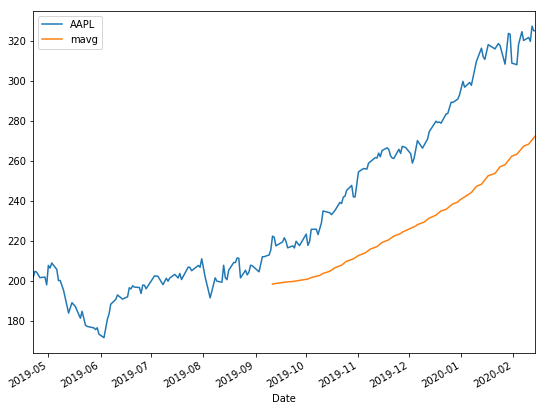

In [18]:
# Plot Moving Average
import matplotlib.pyplot as plt
from matplotlib import style

#Adjusting the size of matplotib
import matplotlib as mpl
mpl.rc('figure', figsize=(9, 7))

#style
style.use('fast')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

# SK_LEARN prediction

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [20]:
dfreg = df.loc[:, ['Adj Close', 'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-04-22,201.887497,19439500.0,1.271210,0.838139
2019-04-23,204.799362,23323000.0,1.855604,1.491955
2019-04-24,204.483505,17540600.0,0.690284,-0.096449
2019-04-25,202.627808,18543200.0,1.286048,-0.749409
2019-04-26,201.660461,18649100.0,1.409694,-0.292821


In [48]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split


# get 1% of the data to forecast
forecast_out = int(math.ceil(0.1 * len(dfreg)))
forecast_col = 'Adj Close'

dfreg['label'] = dfreg[forecast_col].shift(-forecast_out) # shif back 20 and create it as a label
X = np.array(dfreg.drop(['label'], 1)) # the inputs
X = preprocessing.scale(X)

X_lately = X[-forecast_out:] # last _21_ element 
X = X[:-forecast_out] # every thing except last _21_ element

# seprate the labels
y = np.array(dfreg['label'])
y = y[:-forecast_out]

dfreg.tail(10)

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2020-02-03,307.929199,43496400.0,3.651263,1.432802,NaN
2020-02-04,318.095062,34154100.0,1.884902,1.122707,NaN
2020-02-05,320.688934,29706700.0,1.807434,-0.639830,NaN
2020-02-06,324.440002,26356400.0,1.525166,0.818422,NaN
2020-02-07,320.029999,29421000.0,1.687340,-0.725873,NaN
2020-02-10,321.549988,27337200.0,2.394645,2.345788,NaN
2020-02-11,319.609985,23580800.0,1.623855,-1.233010,NaN
2020-02-12,327.200012,28432600.0,1.757335,1.782440,NaN
2020-02-13,324.869995,23686900.0,0.883429,0.209751,NaN


In [29]:
clfreg = LinearRegression(n_jobs)

[20, 30, 40, 50, 2, 3]